In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [176]:
df = pd.read_csv("/content/Forbes Billionaires.csv")

In [177]:
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


In [179]:
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

In [180]:
# number of duplication
print('Number of duplication values are :', df.duplicated().sum())

Number of duplication values are : 0


In [181]:
# There are no duplicated values and any null values, No more data cleaning need

In [182]:
df.describe()

,Rank,Networth,Age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


In [183]:
fig = px.bar(df.sort_values(by ='Networth', ascending=False)[:10], x = 'Name', y='Networth')
fig.show()

In [184]:
px.scatter(df.sort_values(by='Networth', ascending = False)[:10], y='Networth', x ='Name',
           template='plotly_dark',size='Networth',color='Industry',opacity=0.85,title='<b>Industries of top 10 billionaires')

In [185]:
# Insights 
# base On the graph the most 10 billiorars belong from technology indesurty with huge network
# the first billionr on the our dataset is Elen Musk 
# Warren Buffet is coming from Finance and inverment industries with net worht of 118$

In [186]:
px.scatter(df.sort_values(by = 'Networth', ascending=False)[:10], x = 'Name', y = 'Networth', template= 'plotly_dark', size ='Networth', color = 'Source', opacity = 0.85, title='<b>Source of top 10 billiioners')
      

In [187]:
# The richest billionir Elon Musk hast is 219 B dolors netwok coming form the source of Tesla, SpaceX
# The second richest billionar Jeff Bezoe hast its 171 B dollarts netweroth coming fr4om the source of Amazon
# Bill Gates with a netwroth of 129B doloors have the common source of Microsoft 
# Larry page with networth of 111 B dollors hgave the common sourve of google

In [188]:
fig = px.histogram(df, x= 'Age', template = 'plotly_dark', color = 'Age', opacity = 0.9, title= '<b> Disturbation of age in billionaries')
fig.show()

In [189]:
# Insights
# Most of the top billionars have the age of 64
# the disturbation is almost eqalluy skewed. it shos that we have younger and old billioners equal in number
# the youngest billioars has the age of 19 
# the oldest billionras has the age of 100

In [190]:
fig = px.bar(df.sort_values( by='Networth', ascending = False)[:10], x = 'Name', y = 'Age', template = 'plotly_dark', color = 'Age', opacity = 0.8, title = '<b>Top 10 billionaires and their age')
fig.show()

In [191]:
# Warren Buffett is the oldest person on the graoh 
# After that is larry ellison on the list

In [192]:
fig = px.bar(df.sort_values('Age', ascending = False)[:10], x = 'Name', y='Networth', template = 'plotly_dark', color = 'Age', opacity = 0.8, title = '<b> Top 10 oldest Billionaris')
fig.show()

In [193]:
# The George Joseog with the age of 100 and a netweot pof 1.8 B dollors
# the richest billioar in top 10 oldest billionar is Robert Kuok with the age oif 898 and a netwrok of 11.7 dollors
# the 10th billior in top 10 oldest billior is Nobustogi shimamura with the age of 96 and a networht of 1.3B dollors
# Most of the billiors are old people

##**Based On the country**

In [194]:
country_networth = df.groupby('Country').sum()[['Networth']].sort_values('Networth', ascending = False).reset_index().head(10)
fig=px.scatter(country_networth, x ='Country', y='Networth', template = 'plotly_dark', color = 'Country', size = 'Networth', opacity= 0.85, title= "<b> Total networht of billionras in top 10 countries")
fig.show()

In [195]:
# United state has the highest total netweoth of around 4685.1 dolors
# united kingdom has the lowest trotal netweoth in top countroies which is around 199.1 B doollors
# China is the second country in top 10 couuntries woth a neworth 1938.45

##**What kind of industry does to 5 countries work in**

In [196]:
## extracting information from the dataset about the top 5 counteries and what industries they have a millionaire working in

In [197]:
df_us = df[df['Country']== 'United States']['Industry'].value_counts().rename_axis('Industry').reset_index(name='United States')
df_cn = df[df['Country']== 'China']['Industry'].value_counts().rename_axis('Industry').reset_index(name='China')
df_in = df[df['Country']== 'India']['Industry'].value_counts().rename_axis('Industry').reset_index(name='Inida')
df_ge = df[df['Country']== 'Germany']['Industry'].value_counts().rename_axis('Industry').reset_index(name='Germany')
df_fr = df[df['Country']== 'France']['Industry'].value_counts().rename_axis('Industry').reset_index(name='France')

In [198]:
df_us_cn = pd.merge(df_us, df_cn, on = 'Industry', how = 'left')
df_in_ge = pd.merge(df_in, df_ge, on = 'Industry', how = 'left')
df_1 = pd.merge(df_us_cn, df_in_ge, on ='Industry', how = 'left')
df = pd.merge(df_1, df_fr, on = 'Industry', how ='left')

In [199]:
fig = px.scatter(df, x = 'Industry', y = 'United States', template = 'plotly_dark', color = 'Industry', size = 'United States', opacity = 0.85, title = "<b>United States networth in all industries", height = 560)
fig.show()

In [200]:
# The unites stats has it is major netwoeth coming from the industry of finance and investment withc is 193 b dollors
# the sexond biggest industry of united state us technology with newthworth of 137 dollors
# addidtionaly, united state has it is least netweorth of 2 B dollors coming from the industry of metrals and minning.


In [201]:
df


,Industry,United States,China,Inida,Germany,France
0,Finance & Investments,193,10.0,10.0,12.0,4.0
1,Technology,137,81.0,16.0,11.0,2.0
2,Food & Beverage,63,45.0,10.0,8.0,6.0
3,Fashion & Retail,53,29.0,15.0,29.0,8.0
4,Real Estate,46,32.0,8.0,4.0,1.0
5,Media & Entertainment,41,11.0,1.0,7.0,NaN
6,Energy,32,20.0,1.0,1.0,1.0
7,Healthcare,32,69.0,30.0,21.0,7.0
8,Manufacturing,25,142.0,31.0,23.0,1.0
9,Sports,24,NaN,NaN,NaN,NaN


In [202]:
# Need to get a copy from my data incase of losing or data leakage
eda_ml = df.copy()

In [203]:
eda_ml.isna().sum()

Industry         0
United States    0
China            2
Inida            2
Germany          4
France           4
dtype: int64

In [204]:
eda_ml.duplicated().sum()

0

In [205]:
eda_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Industry       18 non-null     object 
 1   United States  18 non-null     int64  
 2   China          16 non-null     float64
 3   Inida          16 non-null     float64
 4   Germany        14 non-null     float64
 5   France         14 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1008.0+ bytes


In [206]:
eda_ml.describe(include='all')

,Industry,United States,China,Inida,Germany,France
count,18,18.000000,16.000000,16.000000,14.000000,14.000000
unique,18,NaN,NaN,NaN,NaN,NaN
top,Finance & Investments,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.944444,32.187500,10.062500,9.142857,3.071429
std,NaN,49.736331,36.936375,9.581014,9.214179,2.335818
min,NaN,2.000000,4.000000,1.000000,1.000000,1.000000
25%,NaN,8.250000,9.750000,2.500000,1.000000,1.250000
50%,NaN,24.500000,18.500000,8.500000,7.500000,2.000000
75%,NaN,44.750000,35.250000,15.250000,11.750000,3.750000


##**Validation split data**

In [207]:
X = eda_ml.drop(columns=['Industry','United States','China','Inida','Germany','France'])
y = eda_ml['Industry']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


##**Column Selctors**

In [209]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

##**Column Transformer**

In [210]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean_imputer')


In [211]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

##**Preprocessing**

In [212]:
# making a tuple for preprocessing for numeric columns and numerical columns
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [213]:
# make column transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple)

In [214]:
# used fit here for X_train
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb4c570160>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb4c570850>)])

##**Pipeline**

In [215]:
#numeric pipleline
numeric_pipe = make_pipeline(mean_imputer, scaler)

numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='mean_imputer')),
                ('standardscaler', StandardScaler())])

In [216]:

categorical_pipe = make_pipeline(freq_imputer, ohe)

categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

##**Column Transformer**

In [217]:
# tupke for thge coloumn transformer
number_tuple = (numeric_pipe, num_selector)
categorical_tuple = (categorical_pipe, cat_selector)

# Co;lumnTransformer
preprocessor = make_column_transformer(number_tuple, categorical_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='mean_imputer')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb4c570160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb4c570850>)])

In [218]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='mean_imputer')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb4c570160>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feb4c570850>)])

In [219]:
# Processing x_train and X_test
X_train_proocessd = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [220]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


##**Resault**

In [221]:
# Check for data type
print('All data in x_train_proprcesse are', X_train_proocessd.dtype)
print('All data in x_train_propreces are', X_test_processed.dtype)

All data in x_train_proprcesse are float64
All data in x_train_propreces are float64


In [222]:
## data shape
print('Shape of data is ', X_train_proocessd.shape)

Shape of data is  (13, 0)


In [223]:
np.isnan(X_train_transformed).sum()

0

#**Function**

##**Bin the target**

In [224]:
eda_ml['Industry'].head()

0    Finance & Investments 
1               Technology 
2          Food & Beverage 
3         Fashion & Retail 
4              Real Estate 
Name: Industry, dtype: object

In [249]:
X = df[['United States','Networth']]

KeyError: ignored

In [232]:
scaled_df = scaler.fit_transform(X)

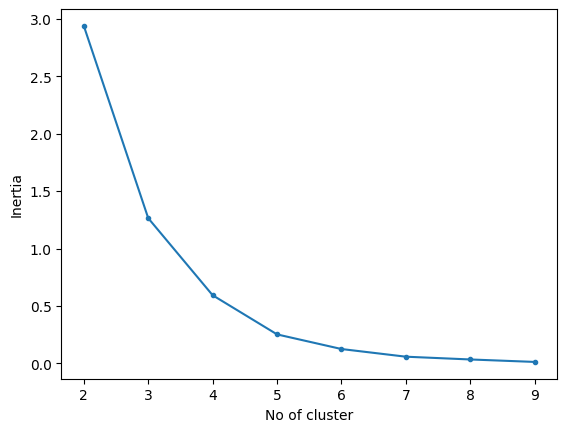

In [233]:
# define a range of values of k to evaluate for inertia, fit and run the model, and plot the results

ks = range(2,10)
inertias = []

for k in ks:
  model = KMeans(n_clusters = k)
  model.fit(scaled_df)
  inertias.append(model.inertia_)


# plot no of cluster and inertia

plt.plot(ks,inertias,marker = '.')
plt.xlabel('No of cluster')
plt.ylabel('Inertia')
plt.show()

In [234]:
## Based on the above graph k = 5 or 6 indicated elbow so it would be the optimal values
## The best clustering is a balance between the lowes number of cluster and the lowes inertia 

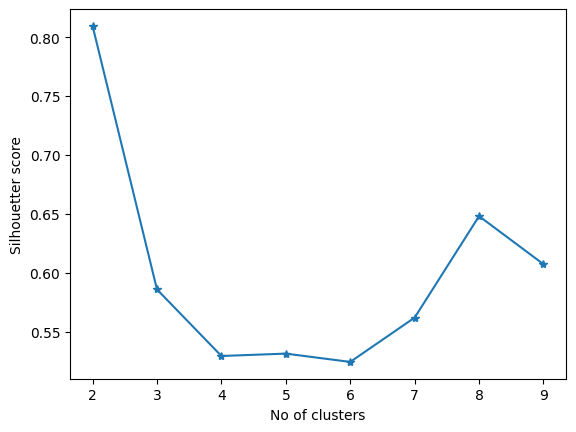

In [238]:
# Define the range of values of k mean to evalute for silhouttte score and run the model and plot the result
ks = range(2, 10)
sil = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(scaled_df)
  sil.append(silhouette_score(scaled_df, model.labels_))
plt.plot(ks, sil, marker = '*')
plt.xlabel('No of clusters')
plt.ylabel('Silhouetter score')
plt.show()

In [239]:
# based on the above gragh k = 4 to 6 would be thge optimal values


###***Final modle and clustering dataset*** italicized text

In [240]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
kmeans = KMeans(n_clusters=6,random_state=42)

# Fit your model on the scaled data
kmeans.fit(scaled_df)

# add a column to the dataframe to add the cluster label as you fit and predict x 
df['Cluster'] = kmeans.labels_

# examine your dataframe with .head()
df.head()

,Industry,United States,China,Inida,Germany,France,Cluster
0,Finance & Investments,193,10.0,10.0,12.0,4.0,1
1,Technology,137,81.0,16.0,11.0,2.0,3
2,Food & Beverage,63,45.0,10.0,8.0,6.0,5
3,Fashion & Retail,53,29.0,15.0,29.0,8.0,5
4,Real Estate,46,32.0,8.0,4.0,1.0,0


##**Cluster for each values** **bold text** 

In [242]:
# Min, Max and mean value for each cluster 

cluster_groups = df.groupby('Cluster')
for col in df.columns:
  print('\n', col)
  display(cluster_groups[col].describe())


 Industry


,count,unique,top,freq
Cluster,,,,
0,4,4,Real Estate,1
1,1,1,Finance & Investments,1
2,5,5,Manufacturing,1
3,1,1,Technology,1
4,5,5,Gambling & Casinos,1
5,2,2,Food & Beverage,1



 United States


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,37.75,6.946222,32.0,32.0,36.5,42.25,46.0
1,1.0,193.00,NaN,193.0,193.0,193.0,193.00,193.0
2,5.0,19.60,4.615192,15.0,16.0,18.0,24.00,25.0
3,1.0,137.00,NaN,137.0,137.0,137.0,137.00,137.0
4,5.0,4.80,1.643168,2.0,5.0,5.0,6.00,6.0
5,2.0,58.00,7.071068,53.0,55.5,58.0,60.50,63.0



 China


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,33.0,25.495098,11.0,17.75,26.0,41.25,69.0
1,1.0,10.0,NaN,10.0,10.00,10.0,10.00,10.0
2,4.0,47.0,63.503281,9.0,15.00,18.5,50.50,142.0
3,1.0,81.0,NaN,81.0,81.00,81.0,81.00,81.0
4,4.0,7.5,4.041452,4.0,4.75,6.5,9.25,13.0
5,2.0,37.0,11.313708,29.0,33.00,37.0,41.00,45.0



 Inida


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,10.0,13.735599,1.0,1.00,4.5,13.50,30.0
1,1.0,10.0,NaN,10.0,10.00,10.0,10.00,10.0
2,4.0,15.0,11.747340,4.0,7.75,12.5,19.75,31.0
3,1.0,16.0,NaN,16.0,16.00,16.0,16.00,16.0
4,4.0,2.5,1.914854,1.0,1.00,2.0,3.50,5.0
5,2.0,12.5,3.535534,10.0,11.25,12.5,13.75,15.0



 Germany


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,8.25,8.845903,1.0,3.25,5.5,10.50,21.0
1,1.0,12.00,NaN,12.0,12.00,12.0,12.00,12.0
2,4.0,8.25,10.372239,1.0,1.00,4.5,11.75,23.0
3,1.0,11.00,NaN,11.0,11.00,11.0,11.00,11.0
4,2.0,1.00,0.000000,1.0,1.00,1.0,1.00,1.0
5,2.0,18.50,14.849242,8.0,13.25,18.5,23.75,29.0



 France


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,3.0,3.000000,3.464102,1.0,1.0,1.0,4.00,7.0
1,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
2,4.0,1.750000,0.957427,1.0,1.0,1.5,2.25,3.0
3,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
4,3.0,2.333333,0.577350,2.0,2.0,2.0,2.50,3.0
5,2.0,7.000000,1.414214,6.0,6.5,7.0,7.50,8.0



 Cluster


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
2,5.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
4,5.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


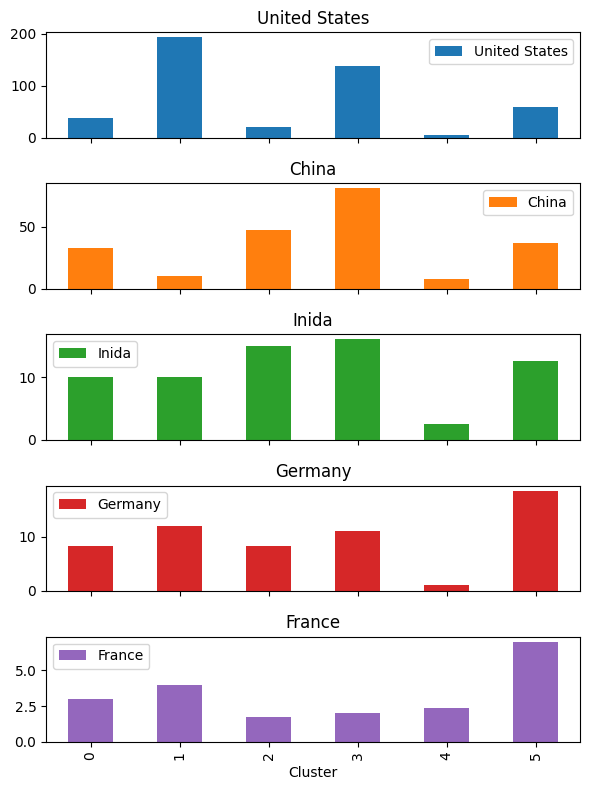

In [248]:
cluster_groups.mean().plot(subplots =True, kind='bar', figsize = (6,8))
plt.tight_layout()

In [250]:
# Based on the above cluster feature, we could China and Germany reaching up to the united state.